# Digit Classifier
The Digit Classifier (Handwritten Digit Prediction System) exemplifies a modern, cloud-based application architecture that leverages the strengths of various technologies, including Python, TensorFlow, Flask, Docker, AWS ECS, and Anvil. By integrating robust backend processing using Python and TensorFlow for building Convolutional Neural Networks (CNN) and Vision Transformers (ViT) for digit prediction, with an intuitive frontend interface, the system offers a highly accessible and efficient solution for digit prediction tasks. This architecture not only ensures scalability and reliability but also serves as a template for developing similar prediction services in the future. Through the use of these technologies, the Digit Classifier stands as a testament to the power of combining advanced machine learning models with cloud infrastructure to create scalable and accessible applications.

## Import Necessary Libraries

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import datasets
from tensorflow.keras.models import load_model
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load and Prepare the MNIST Dataset

In [8]:
# Load and prepare the MNIST dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = datasets.mnist.load_data()
mnist_train_images, mnist_test_images = mnist_train_images / 255.0, mnist_test_images / 255.0
mnist_train_images = mnist_train_images.reshape((60000, 28, 28, 1))
mnist_test_images = mnist_test_images.reshape((10000, 28, 28, 1))

11490434/11490434 [==============================] - 2s 0us/step


## Build CNN Model

In [ ]:
# Build the convolutional base using the Keras layers
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Define a callback to get test accuracy after each epoch
class TestCallback(callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs=None):
        x_test, y_test = self.test_data
        test_loss, test_acc = self.model.evaluate(x_test, y_test, verbose=0)
        print(f'\nTesting loss: {test_loss}, test accuracy: {test_acc}')

# Train the model with a validation split
epochs = 25
history = cnn_model.fit(mnist_train_images, mnist_train_labels, epochs=epochs,
                    validation_split=0.2,  # Use 20% of the training data for validation
                    callbacks=[TestCallback((mnist_test_images, mnist_test_labels))])

cnn_model.save('CNN')
!zip -r CNN.zip /content/CNN

Epoch 1/25
1491/1500 [============================>.] - ETA: 0s - loss: 0.1615 - accuracy: 0.9498
Testing loss: 0.04165523871779442, test accuracy: 0.9861000180244446
1500/1500 [==============================] - 13s 5ms/step - loss: 0.1609 - accuracy: 0.9500 - val_loss: 0.0524 - val_accuracy: 0.9847
Epoch 2/25
1499/1500 [============================>.] - ETA: 0s - loss: 0.0483 - accuracy: 0.9846
Testing loss: 0.03556588664650917, test accuracy: 0.9882000088691711
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0483 - accuracy: 0.9846 - val_loss: 0.0474 - val_accuracy: 0.9862
Epoch 3/25
1487/1500 [============================>.] - ETA: 0s - loss: 0.0349 - accuracy: 0.9889
Testing loss: 0.044323377311229706, test accuracy: 0.9861000180244446
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0349 - accuracy: 0.9889 - val_loss: 0.0473 - val_accuracy: 0.9846
Epoch 4/25
1498/1500 [============================>.] - ETA: 0s - loss: 0.0258 - accuracy: 0.9916


## Epoch vs. Accuracy - CNN

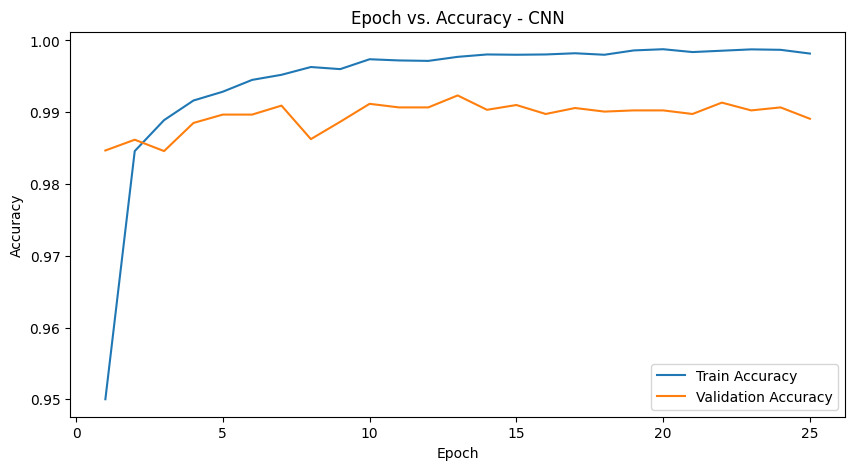

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), history.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, epochs+1), history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs. Accuracy - CNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('epoch_vs_accuracy_cnn.png', dpi=300)
plt.show()

## Check for saved model

In [6]:
cnn_model_path = '/content/drive/MyDrive/Colab Notebooks/Optimization II - Digit Classifier/CNN Assets Before Calbiration/content/CNN'

if os.path.exists(cnn_model_path):
  cnn_model = load_model(cnn_model_path)
  print("cnn model loaded sucessfully")

cnn model loaded sucessfully


## Confusion Matrix

313/313 [==============================] - 1s 2ms/step


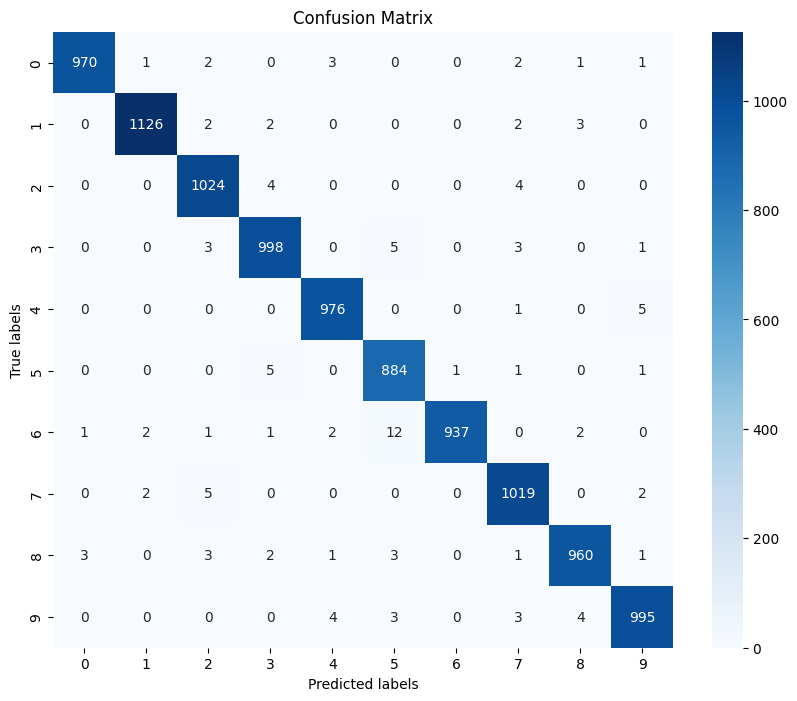

In [ ]:
# Make predictions
predictions = cnn_model.predict(mnist_test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(mnist_test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_cnn.png', dpi=300)
plt.show()

## Visualize Misclassifications - CNN

313/313 [==============================] - 3s 3ms/step


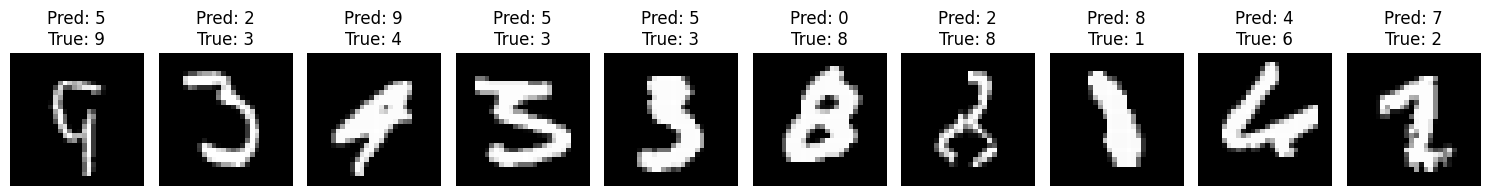

In [9]:
# Predict the labels for test images using the trained cnn_model
predictions = cnn_model.predict(mnist_test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Find misclassified examples
misclassified_indices = np.where(predicted_labels != mnist_test_labels)[0]
misclassified_samples = mnist_test_images[misclassified_indices]
misclassified_labels = predicted_labels[misclassified_indices]
true_labels = mnist_test_labels[misclassified_indices]

# Visualize some of the misclassified examples
num_samples_to_display = 10
plt.figure(figsize=(15, 4))
for i, (image, pred_label, true_label) in enumerate(zip(misclassified_samples, misclassified_labels, true_labels)):
    if i >= num_samples_to_display:
        break
    plt.subplot(2, num_samples_to_display, i+1)
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")

plt.tight_layout()
plt.savefig('misclassifications_cnn.png', dpi=300)
plt.show()

## Visualize Correct Classifications

313/313 [==============================] - 1s 2ms/step


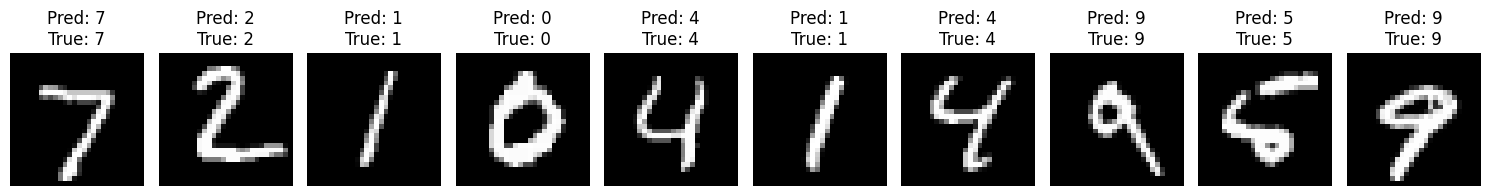

In [10]:
# Predict the labels for test images using the trained cnn_model
predictions = cnn_model.predict(mnist_test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Find correctly classified examples
correct_indices = np.where(predicted_labels == mnist_test_labels)[0]
correct_samples = mnist_test_images[correct_indices]
correct_labels = predicted_labels[correct_indices]
true_labels = mnist_test_labels[correct_indices]

# Visualize some of the correctly classified examples
num_samples_to_display = 10
plt.figure(figsize=(15, 4))
for i, (image, pred_label, true_label) in enumerate(zip(correct_samples, correct_labels, true_labels)):
    if i >= num_samples_to_display:
        break
    plt.subplot(2, num_samples_to_display, i+1)
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")

plt.tight_layout()
plt.savefig('correct_classifications_cnn.png')
plt.show()

## Calibrate Model - CNN


In [ ]:
# Build the convolutional base using the Keras layers
cnn_model_cal = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
cnn_model_cal.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model with a validation split
epochs = 14
history_cnn_cal = cnn_model_cal.fit(mnist_train_images, mnist_train_labels, epochs=epochs)

# Evaluate the model
test_loss, test_acc = cnn_model_cal.evaluate(mnist_test_images, mnist_test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

cnn_model_cal.save('CNN_cal')
!zip -r CNN_cal.zip /content/CNN_cal

Epoch 1/14
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1508 - accuracy: 0.9532
Epoch 2/14
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0473 - accuracy: 0.9855
Epoch 3/14
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0330 - accuracy: 0.9895
Epoch 4/14
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0261 - accuracy: 0.9920
Epoch 5/14
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0200 - accuracy: 0.9933
Epoch 6/14
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0166 - accuracy: 0.9946
Epoch 7/14
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0139 - accuracy: 0.9954
Epoch 8/14
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0107 - accuracy: 0.9966
Epoch 9/14
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0101 - accuracy: 0.9965
Epoch 10/14
1875/1875 [==============================] - 8s 4ms/step - loss: 0.008

## Confusion Matrix - CNN_cal

313/313 [==============================] - 1s 2ms/step


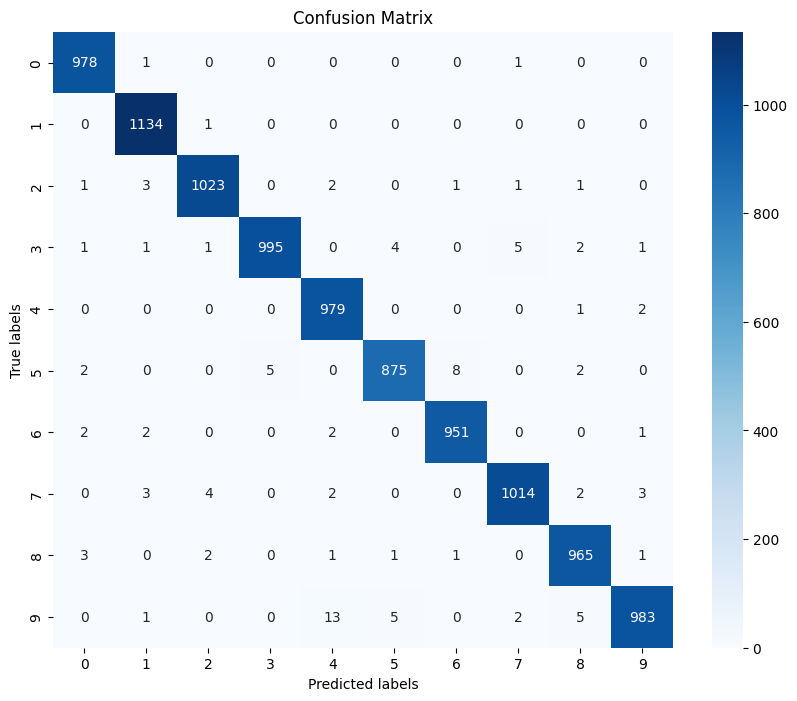

In [ ]:
# Make predictions
predictions = cnn_model_cal.predict(mnist_test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(mnist_test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_cnn_cal.png', dpi=300)
plt.show()

## Check for saved model

In [11]:
cnn_model_cal_path = '/content/drive/MyDrive/Colab Notebooks/Optimization II - Digit Classifier/CNN Cal Assets/content/CNN_cal'

if os.path.exists(cnn_model_cal_path):
  cnn_model_cal = load_model(cnn_model_cal_path)
  print("cnn cal model loaded sucessfully")

cnn cal model loaded sucessfully


## Visualize Misclassifications - CNN_cal

313/313 [==============================] - 1s 2ms/step


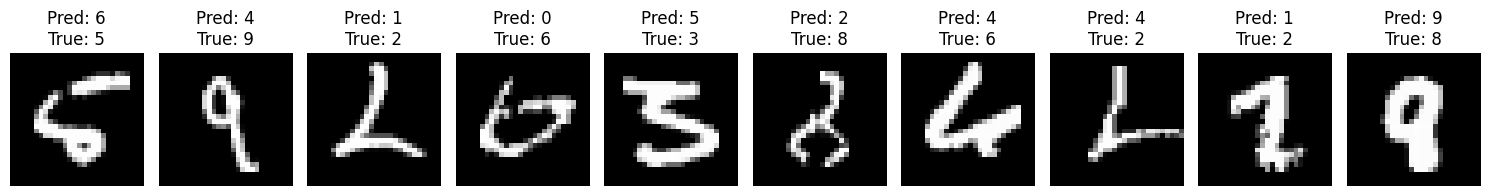

In [12]:
# Predict the labels for test images using the trained cnn_model
predictions = cnn_model_cal.predict(mnist_test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Find misclassified examples
misclassified_indices = np.where(predicted_labels != mnist_test_labels)[0]
misclassified_samples = mnist_test_images[misclassified_indices]
misclassified_labels = predicted_labels[misclassified_indices]
true_labels = mnist_test_labels[misclassified_indices]

# Visualize some of the misclassified examples
num_samples_to_display = 10
plt.figure(figsize=(15, 4))
for i, (image, pred_label, true_label) in enumerate(zip(misclassified_samples, misclassified_labels, true_labels)):
    if i >= num_samples_to_display:
        break
    plt.subplot(2, num_samples_to_display, i+1)
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")

plt.tight_layout()
plt.savefig('misclassifications_cnn_cal.png', dpi=300)
plt.show()

## Visualize Correct Classifications - CNN_cal

313/313 [==============================] - 1s 4ms/step


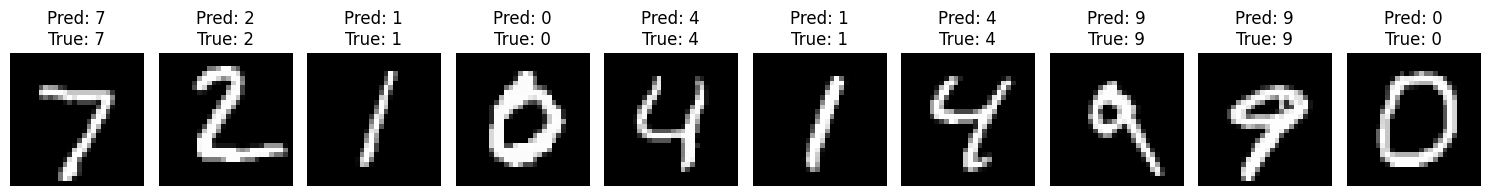

In [14]:
# Predict the labels for test images using the trained cnn_model
predictions = cnn_model_cal.predict(mnist_test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Find correctly classified examples
correct_indices = np.where(predicted_labels == mnist_test_labels)[0]
correct_samples = mnist_test_images[correct_indices]
correct_labels = predicted_labels[correct_indices]
true_labels = mnist_test_labels[correct_indices]

# Visualize some of the correctly classified examples
num_samples_to_display = 10
plt.figure(figsize=(15, 4))
for i, (image, pred_label, true_label) in enumerate(zip(correct_samples, correct_labels, true_labels)):
    if i >= num_samples_to_display:
        break
    plt.subplot(2, num_samples_to_display, i+1)
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")

plt.tight_layout()
plt.savefig('correct_classifications_cnn_cal.png')
plt.show()

# ViT

## Class for ClassToken

In [ ]:
# this is written as a tensorflow "layer".  it's just a vector the same size as the
# output of the previous layer. the vector is initialized randomly, but we'll use
# gradient descent to update the values in the vector
#
# it's purpose is to be appended to the beginning of the sequence of vectors fed into
# the transformer.  then after the transformer runs on the whole data, we just grab
# the resulting zero-th vector...the class token...and use that as the portfolio weights
class ClassToken(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()

    def build(self, input_shape):
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value = w_init(shape=(1, 1, input_shape[-1]), dtype=tf.float32),
            trainable = True
        )

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        hidden_dim = self.w.shape[-1]

        cls = tf.broadcast_to(self.w, [batch_size, 1, hidden_dim])
        cls = tf.cast(cls, dtype=inputs.dtype)
        return cls

## Build ViT

In [ ]:
def build_ViT(n,m,block_size,hidden_dim,num_layers,num_heads,key_dim,mlp_dim,dropout_rate,num_classes):
    # n is number of rows of blocks
    # m is number of cols of blocks
    # block_size is number of pixels (with rgb) in each block

    inp = tf.keras.layers.Input(shape=(n*m,block_size))
    inp2 = tf.keras.layers.Input(shape=(n*m))
    mid = tf.keras.layers.Dense(hidden_dim)(inp) # transform to vectors with different dimension
    # the positional embeddings
#     positions = tf.range(start=0, limit=n*m, delta=1)
    emb = tf.keras.layers.Embedding(input_dim=n*m, output_dim=hidden_dim)(inp2) # learned positional embedding for each of the n*m possible possitions
    mid = mid + emb # for some reason, tf.keras.layers.Add causes an error, but + doesn't?
    # create and append class token to beginning of all input vectors
    token = ClassToken()(mid) # append class token to beginning of sequence
    mid = tf.keras.layers.Concatenate(axis=1)([token, mid])

    for l in range(num_layers): # how many Transformer Head layers are there?
        ln  = tf.keras.layers.LayerNormalization()(mid) # normalize
        mha = tf.keras.layers.MultiHeadAttention(num_heads=num_heads,key_dim=key_dim,value_dim=key_dim)(ln,ln,ln) # self attention!
        add = tf.keras.layers.Add()([mid,mha]) # add and norm
        ln  = tf.keras.layers.LayerNormalization()(add)
        den = tf.keras.layers.Dense(mlp_dim,activation='gelu')(ln) # maybe should be relu...who knows...
        den = tf.keras.layers.Dropout(dropout_rate)(den) # regularization
        den = tf.keras.layers.Dense(hidden_dim)(den) # back to the right dimensional space
        den = tf.keras.layers.Dropout(dropout_rate)(den)
        mid = tf.keras.layers.Add()([den,add]) # add and norm again
    ln = tf.keras.layers.LayerNormalization()(mid)
    fl = ln[:,0,:] # just grab the class token for each image in batch
    clas = tf.keras.layers.Dense(num_classes,activation='softmax')(fl) # probability that the image is in each category
    mod = tf.keras.models.Model([inp,inp2],clas)
    mod.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return mod

## Define ViT Parameters

In [ ]:
n = 7
m = 7
block_size = 16
hidden_dim = 128
num_layers = 4
num_heads = 8
key_dim = hidden_dim//num_heads # usually good practice for key_dim to be hidden_dim//num_heads...this is why we do Multi-Head attention
mlp_dim = hidden_dim
dropout_rate = 0.1
num_classes = 10

## Build ViT model and display the summary

In [ ]:
vit_model = build_ViT(n,m,block_size,hidden_dim,num_layers,num_heads,key_dim,mlp_dim,dropout_rate,num_classes)
vit_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 49, 16)]             0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 49)]                 0         []                            
                                                                                                  
 dense_18 (Dense)            (None, 49, 128)              2176      ['input_3[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 49, 128)              6272      ['input_4[0][0]']             
                                                                                            

## Data Preparation - ViT

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]

In [ ]:
x_train_ravel = np.zeros((ndata_train,n*m,block_size))
for img in range(ndata_train):
    ind = 0
    for row in range(n):
        for col in range(m):
            x_train_ravel[img,ind,:] = x_train[img,(row*4):((row+1)*4),(col*4):((col+1)*4)].ravel()
            ind += 1


In [ ]:
x_test_ravel = np.zeros((ndata_test,n*m,block_size))
for img in range(ndata_test):
    ind = 0
    for row in range(n):
        for col in range(m):
            x_test_ravel[img,ind,:] = x_test[img,(row*4):((row+1)*4),(col*4):((col+1)*4)].ravel()
            ind += 1

In [ ]:
pos_feed_train = np.array([list(range(n*m))]*ndata_train)
pos_feed_test = np.array([list(range(n*m))]*ndata_test)

## Tarin and Save the ViT Model

In [ ]:
history_vit = vit_model.fit([x_train_ravel,pos_feed_train],y_train,epochs=54,batch_size = 40,validation_split=0.2)
vit_model.save('ViT')

!zip -r ViT.zip /content/ViT

Epoch 1/54
1200/1200 [==============================] - 33s 18ms/step - loss: 0.5515 - accuracy: 0.8149 - val_loss: 0.2413 - val_accuracy: 0.9251
Epoch 2/54
1200/1200 [==============================] - 23s 20ms/step - loss: 0.2250 - accuracy: 0.9288 - val_loss: 0.1768 - val_accuracy: 0.9469
Epoch 3/54
1200/1200 [==============================] - 21s 18ms/step - loss: 0.1806 - accuracy: 0.9427 - val_loss: 0.1799 - val_accuracy: 0.9442
Epoch 4/54
1200/1200 [==============================] - 21s 18ms/step - loss: 0.1539 - accuracy: 0.9523 - val_loss: 0.1301 - val_accuracy: 0.9597
Epoch 5/54
1200/1200 [==============================] - 32s 27ms/step - loss: 0.1374 - accuracy: 0.9554 - val_loss: 0.1106 - val_accuracy: 0.9682
Epoch 6/54
1200/1200 [==============================] - 25s 20ms/step - loss: 0.1263 - accuracy: 0.9600 - val_loss: 0.1129 - val_accuracy: 0.9663
Epoch 7/54
1200/1200 [==============================] - 31s 25ms/step - loss: 0.1128 - accuracy: 0.9639 - val_loss: 0.1044 -

## Evaluate the ViT Model on Test Data

In [ ]:
out = vit_model.evaluate([x_test_ravel,pos_feed_test],y_test)

313/313 [==============================] - 5s 12ms/step - loss: 0.0577 - accuracy: 0.9844


## Plot Epoch vs Accuracy Graph - ViT

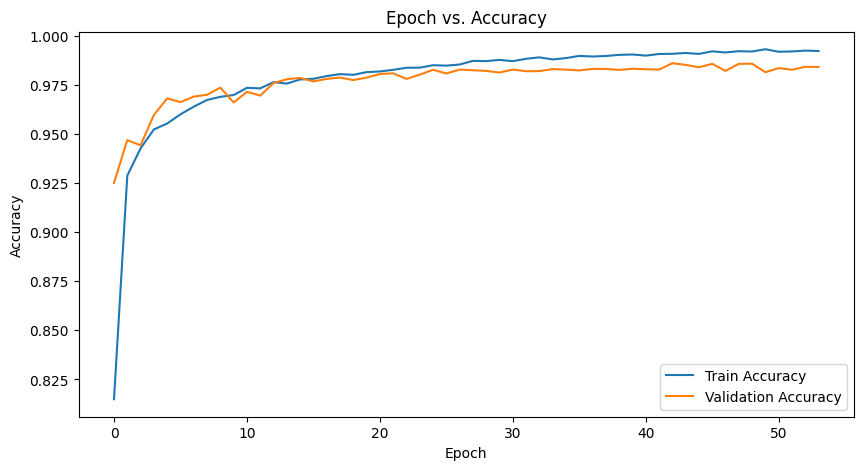

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history_vit.history['accuracy'], label='Train Accuracy')
plt.plot(history_vit.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs. Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('epoch_vs_accuracy_vit.png', dpi=300)
plt.show()

## Plot Confusion Matrix

313/313 [==============================] - 4s 11ms/step


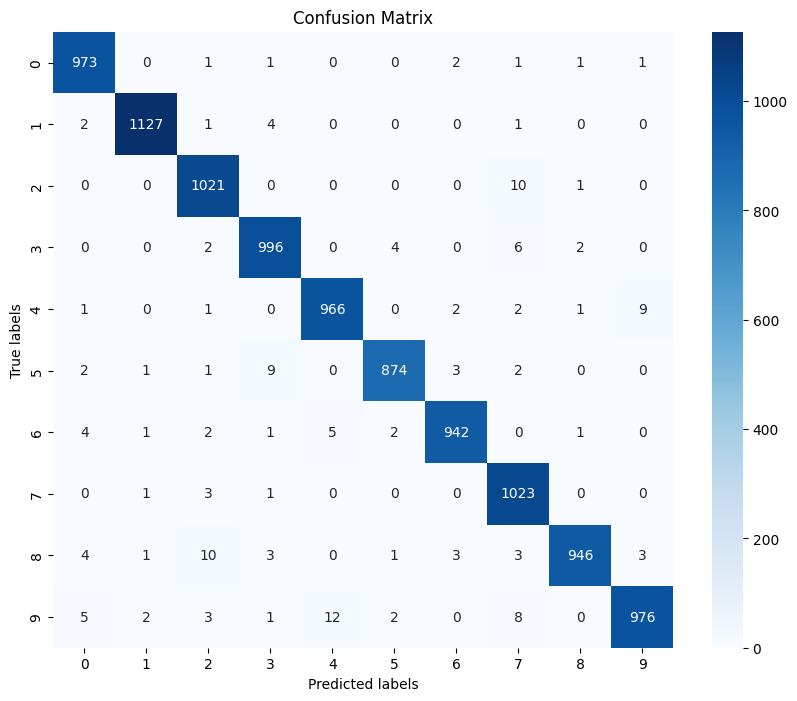

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions
predictions = vit_model.predict([x_test_ravel, pos_feed_test])
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_vit.png', dpi=300)
plt.show()

## Check for saved model

In [15]:
vit_model_path = '/content/drive/MyDrive/Colab Notebooks/Optimization II - Digit Classifier/ViT Assets Before Cal/content/ViT'

if os.path.exists(vit_model_path):
  vit_model = load_model(vit_model_path)
  print("vit model loaded sucessfully")

vit model loaded sucessfully


## Function to reconstruct the image for ViT

In [ ]:
def reconstruct_image(raveled_images, n, m, block_size, img_dim=28):
    # raveled_images: the images in raveled format
    # n, m: number of rows and cols of blocks
    # block_size: number of pixels in each block (16 in your case)
    # img_dim: dimension of one side of the square image (28 for MNIST)

    reconstructed_images = np.zeros((len(raveled_images), img_dim, img_dim))

    block_side = int(np.sqrt(block_size))  # side length of one block, 4 pixels for your case

    for img_index, img in enumerate(raveled_images):
        reconstructed_img = np.zeros((img_dim, img_dim))
        for block_index, block in enumerate(img):
            row = (block_index // m) * block_side
            col = (block_index % m) * block_side
            reconstructed_img[row:row+block_side, col:col+block_side] = block.reshape(block_side, block_side)
        reconstructed_images[img_index] = reconstructed_img

    return reconstructed_images

## Visualize Misclassifications - ViT

313/313 [==============================] - 5s 15ms/step


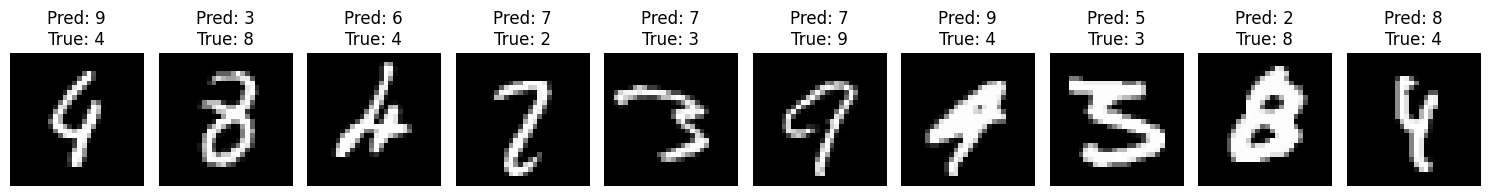

In [ ]:
predictions = vit_model.predict([x_test_ravel, pos_feed_test])

# Convert predictions to label indices
predicted_labels = np.argmax(predictions, axis=1)

# Find misclassified examples
misclassified_indices = np.where(predicted_labels != y_test)[0]
misclassified_samples = x_test_ravel[misclassified_indices]
misclassified_labels = predicted_labels[misclassified_indices]
true_labels = y_test[misclassified_indices]

# Reconstruct the misclassified images from the raveled format
misclassified_reconstructed = reconstruct_image(misclassified_samples, n, m, block_size)

# Visualize the first few misclassified images
num_samples_to_display = 10
plt.figure(figsize=(15, 4))
for i in range(num_samples_to_display):
    if i >= len(misclassified_reconstructed):
        break
    plt.subplot(2, num_samples_to_display, i+1)
    plt.axis('off')
    plt.imshow(misclassified_reconstructed[i], cmap='gray')
    plt.title(f"Pred: {misclassified_labels[i]}\nTrue: {true_labels[i]}")

plt.savefig('misclassifications_vit.png', dpi=300)
plt.tight_layout()
plt.show()

## Visualize Correct Classifications - ViT

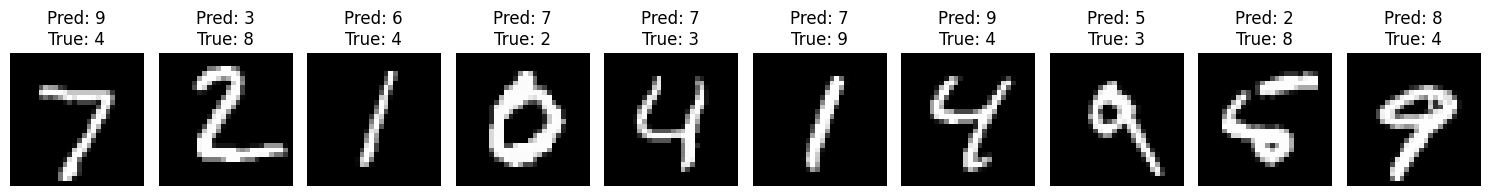

In [ ]:
# Find correctly classified examples
correct_indices = np.where(predicted_labels == y_test)[0]
correct_samples = x_test_ravel[correct_indices]
correct_labels = predicted_labels[correct_indices]

# Reconstruct the correctly classified images from the raveled format
correct_reconstructed = reconstruct_image(correct_samples, n, m, block_size)

# Visualize the first few correctly classified images
plt.figure(figsize=(15, 4))
for i in range(num_samples_to_display):
    if i >= len(correct_reconstructed):
        break
    plt.subplot(2, num_samples_to_display, i+1)
    plt.axis('off')
    plt.imshow(correct_reconstructed[i], cmap='gray')
    plt.title(f"Pred: {misclassified_labels[i]}\nTrue: {true_labels[i]}")

plt.savefig('correct_classifications_vit.png', dpi=300)
plt.tight_layout()
plt.show()

# Calibrated Model

## Calibrate Model - ViT





In [ ]:
vit_model_cal = build_ViT(n,m,block_size,hidden_dim,num_layers,num_heads,key_dim,mlp_dim,dropout_rate,num_classes)
vit_model_cal.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 49, 16)]             0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 49)]                 0         []                            
                                                                                                  
 dense_28 (Dense)            (None, 49, 128)              2176      ['input_5[0][0]']             
                                                                                                  
 embedding_2 (Embedding)     (None, 49, 128)              6272      ['input_6[0][0]']             
                                                                                            

In [ ]:
history_vit_cal = vit_model_cal.fit([x_train_ravel,pos_feed_train],y_train,epochs=43,batch_size = 40) # epochs decided based on epoch vs acc graph

vit_model_cal.save('ViT_cal')
!zip -r ViT_cal.zip /content/ViT_cal

Epoch 1/43
1500/1500 [==============================] - 41s 19ms/step - loss: 0.4780 - accuracy: 0.8423
Epoch 2/43
1500/1500 [==============================] - 30s 20ms/step - loss: 0.2089 - accuracy: 0.9359
Epoch 3/43
1500/1500 [==============================] - 28s 19ms/step - loss: 0.1667 - accuracy: 0.9477
Epoch 4/43
1500/1500 [==============================] - 32s 22ms/step - loss: 0.1480 - accuracy: 0.9539
Epoch 5/43
1500/1500 [==============================] - 30s 20ms/step - loss: 0.1303 - accuracy: 0.9590
Epoch 6/43
1500/1500 [==============================] - 29s 19ms/step - loss: 0.1186 - accuracy: 0.9622
Epoch 7/43
1500/1500 [==============================] - 29s 19ms/step - loss: 0.1102 - accuracy: 0.9649
Epoch 8/43
1500/1500 [==============================] - 29s 19ms/step - loss: 0.1010 - accuracy: 0.9679
Epoch 9/43
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0933 - accuracy: 0.9704
Epoch 10/43
1500/1500 [==============================] - 30s 20m

In [ ]:
out = vit_model_cal.evaluate([x_test_ravel,pos_feed_test],y_test)

313/313 [==============================] - 7s 16ms/step - loss: 0.0435 - accuracy: 0.9869


## Plot Confusion Matrix

313/313 [==============================] - 4s 12ms/step


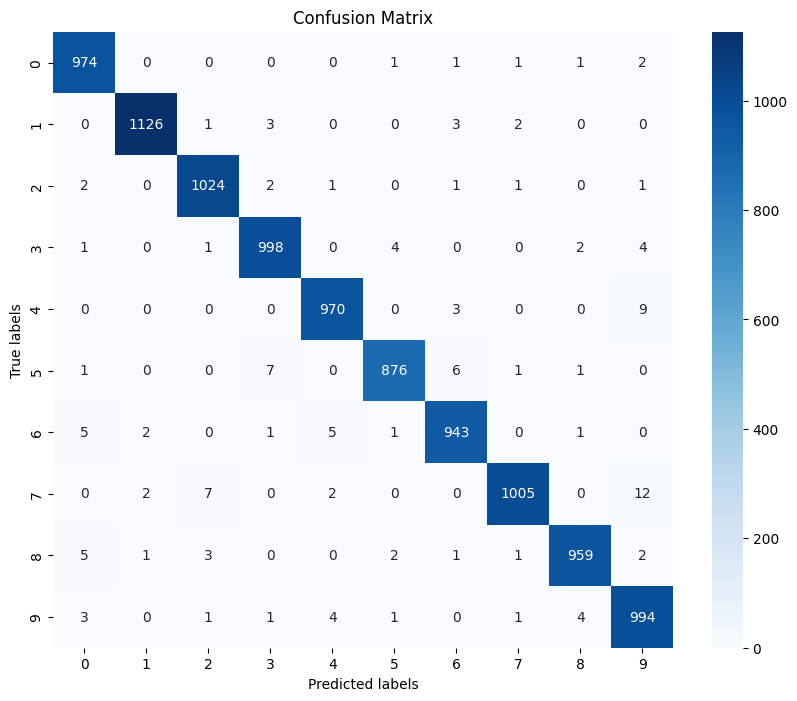

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions
predictions = vit_model_cal.predict([x_test_ravel, pos_feed_test])
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_vit_cal.png', dpi=300)
plt.show()

## Check for saved model

In [16]:
vit_model_cal_path = '/content/drive/MyDrive/Colab Notebooks/Optimization II - Digit Classifier/ViT Assets After Cal/content/ViT_cal'

if os.path.exists(vit_model_cal_path):
  vit_model_cal = load_model(vit_model_cal_path)
  print("vit model cal loaded sucessfully")

vit model cal loaded sucessfully


## Function to reconstruct the image for ViT

In [ ]:
def reconstruct_image(raveled_images, n, m, block_size, img_dim=28):
    # raveled_images: the images in raveled format
    # n, m: number of rows and cols of blocks
    # block_size: number of pixels in each block (16 in your case)
    # img_dim: dimension of one side of the square image (28 for MNIST)

    reconstructed_images = np.zeros((len(raveled_images), img_dim, img_dim))

    block_side = int(np.sqrt(block_size))  # side length of one block, 4 pixels for your case

    for img_index, img in enumerate(raveled_images):
        reconstructed_img = np.zeros((img_dim, img_dim))
        for block_index, block in enumerate(img):
            row = (block_index // m) * block_side
            col = (block_index % m) * block_side
            reconstructed_img[row:row+block_side, col:col+block_side] = block.reshape(block_side, block_side)
        reconstructed_images[img_index] = reconstructed_img

    return reconstructed_images

## Visualize Misclassifications - ViT

313/313 [==============================] - 4s 14ms/step


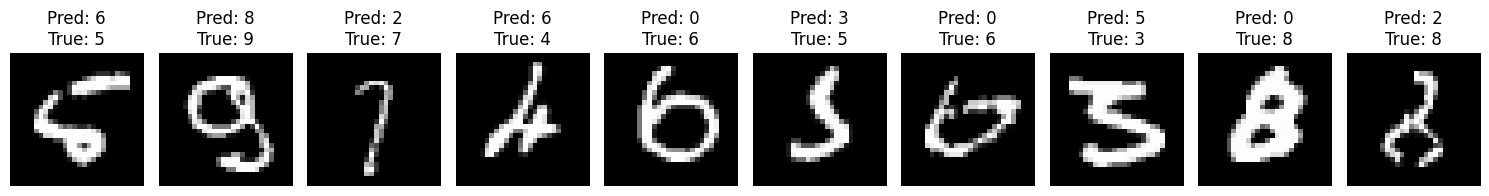

In [ ]:
predictions = vit_model_cal.predict([x_test_ravel, pos_feed_test])

# Convert predictions to label indices
predicted_labels = np.argmax(predictions, axis=1)

# Find misclassified examples
misclassified_indices = np.where(predicted_labels != y_test)[0]
misclassified_samples = x_test_ravel[misclassified_indices]
misclassified_labels = predicted_labels[misclassified_indices]
true_labels = y_test[misclassified_indices]

# Reconstruct the misclassified images from the raveled format
misclassified_reconstructed = reconstruct_image(misclassified_samples, n, m, block_size)

# Visualize the first few misclassified images
num_samples_to_display = 10
plt.figure(figsize=(15, 4))
for i in range(num_samples_to_display):
    if i >= len(misclassified_reconstructed):
        break
    plt.subplot(2, num_samples_to_display, i+1)
    plt.axis('off')
    plt.imshow(misclassified_reconstructed[i], cmap='gray')
    plt.title(f"Pred: {misclassified_labels[i]}\nTrue: {true_labels[i]}")

plt.savefig('misclassifications_vit_cal.png', dpi=300)
plt.tight_layout()
plt.show()

## Visualize Correct Classifications - ViT

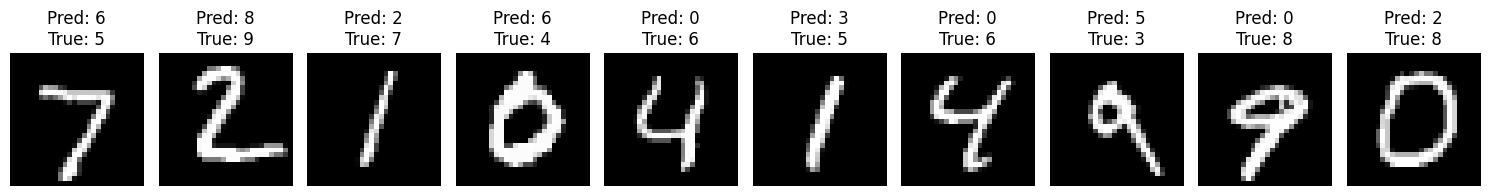

In [ ]:
# Find correctly classified examples
correct_indices = np.where(predicted_labels == y_test)[0]
correct_samples = x_test_ravel[correct_indices]
correct_labels = predicted_labels[correct_indices]

# Reconstruct the correctly classified images from the raveled format
correct_reconstructed = reconstruct_image(correct_samples, n, m, block_size)

# Visualize the first few correctly classified images
plt.figure(figsize=(15, 4))
for i in range(num_samples_to_display):
    if i >= len(correct_reconstructed):
        break
    plt.subplot(2, num_samples_to_display, i+1)
    plt.axis('off')
    plt.imshow(correct_reconstructed[i], cmap='gray')
    plt.title(f"Pred: {misclassified_labels[i]}\nTrue: {true_labels[i]}")

plt.savefig('correct_classifications_vit_cal.png', dpi=300)
plt.tight_layout()
plt.show()